# Train CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam,SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_path = r'Images/data/train'
test_path = r'Images/data/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical',batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical',batch_size=10, shuffle=True)


Found 13500 images belonging to 6 classes.
Found 4500 images belonging to 6 classes.


In [4]:
imgs, labels = next(train_batches)

In [5]:
imgs

array([[[[ 131.061     , -113.779     , -121.68      ],
         [  79.061     , -103.779     , -112.68      ],
         [  83.061     , -108.779     , -114.68      ],
         ...,
         [  80.061     , -110.779     , -104.68      ],
         [  83.061     , -112.779     , -121.68      ],
         [ 101.061     , -111.779     , -117.68      ]],

        [[  77.061     , -111.779     , -111.68      ],
         [ -31.939003  ,   17.221     ,   34.32      ],
         [ -23.939003  ,    1.2210007 ,   12.32      ],
         ...,
         [ -25.939003  ,    4.2210007 ,   18.32      ],
         [ -36.939003  ,  -20.779     ,   -0.6800003 ],
         [  25.060997  ,  -32.779     ,  -22.68      ]],

        [[  81.061     , -106.779     , -116.68      ],
         [ -46.939003  ,  -16.779     ,  -20.68      ],
         [  -9.939003  ,    5.2210007 ,    5.3199997 ],
         ...,
         [ -20.939003  ,   -7.7789993 ,    1.3199997 ],
         [ -22.939003  ,   -6.7789993 ,   13.32      ],
  

In [6]:
labels

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [7]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

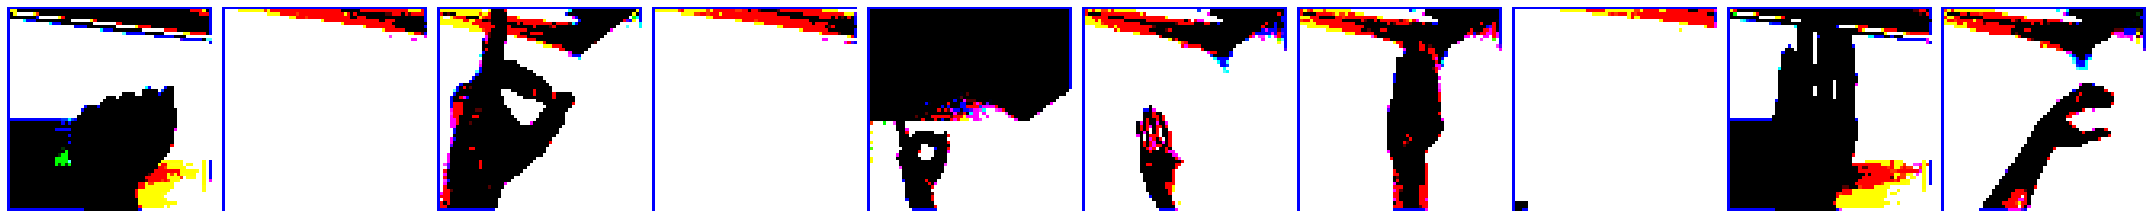

(10, 64, 64, 3)
[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(imgs.shape)
print(labels)

In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten()) #necessary to convert data in one dimensional

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2)) #Used to avoid overfitting problem. Sets weight of 20% neurons as 0 so that they cant influence weights of other neurons
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))#Dropout deactivates some proportion of neurons in layer
model.add(Dense(6,activation ="softmax"))

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001) #Reduce learning rate when a metric has stopped improving.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')#Stop training when a monitored metric has stopped improving.


model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [29]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)
imgs, labels = next(train_batches)

imgs, labels = next(test_batches)
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/10
1350/1350 [==============================] - 78s 57ms/step - loss: 0.0107 - accuracy: 0.9972 - val_loss: 0.0071 - val_accuracy: 0.9978 - lr: 5.0000e-04
Epoch 2/10
1350/1350 [==============================] - 80s 59ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0072 - val_accuracy: 0.9980 - lr: 5.0000e-04
Epoch 3/10
1350/1350 [==============================] - 83s 61ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0067 - val_accuracy: 0.9978 - lr: 5.0000e-04
Epoch 4/10
1350/1350 [==============================] - 98s 72ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0057 - val_accuracy: 0.9984 - lr: 5.0000e-04
Epoch 5/10
1350/1350 [==============================] - 97s 72ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.0053 - val_accuracy: 0.9982 - lr: 5.0000e-04
Epoch 6/10
1350/1350 [==============================] - 102s 75ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0062 - val_accuracy: 0.9978 - lr: 5.0000e-04
Epoch 7/10
1350/1350 

In [30]:
model.save('model_sign1.h5')

In [31]:
print(history2.history)

{'loss': [0.010723160579800606, 0.012088638730347157, 0.008872092701494694, 0.009687843732535839, 0.008774146437644958, 0.007026970852166414, 0.007160291541367769, 0.008172943256795406, 0.00823984295129776], 'accuracy': [0.9971851706504822, 0.9965184926986694, 0.9976296424865723, 0.9973333477973938, 0.9971851706504822, 0.9977777600288391, 0.9980000257492065, 0.9976296424865723, 0.9974074363708496], 'val_loss': [0.007077151443809271, 0.0071897199377417564, 0.006657757330685854, 0.005668682046234608, 0.0052511733956635, 0.00622899504378438, 0.004958163481205702, 0.005336224567145109, 0.005542318802326918], 'val_accuracy': [0.9977777600288391, 0.9980000257492065, 0.9977777600288391, 0.9984444379806519, 0.9982222318649292, 0.9977777600288391, 0.9982222318649292, 0.9984444379806519, 0.9980000257492065], 'lr': [0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}


In [32]:
imgs, labels = next(test_batches)

In [33]:
model = keras.models.load_model(r"model_sign1.h5")

In [34]:
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 1.858300129242707e-05; accuracy of 100.0%


In [35]:
model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

['loss', 'accuracy']

In [36]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'nothing',5:'space'}

In [37]:
predictions = model.predict(imgs, verbose=0)

In [38]:
predictions

array([[1.58505773e-15, 7.42999967e-11, 4.64337499e-13, 1.00000000e+00,
        8.99202104e-17, 5.58868244e-18],
       [2.10277854e-11, 1.00000000e+00, 3.87792363e-17, 5.01098656e-16,
        2.61657520e-19, 2.12141342e-23],
       [2.43660804e-13, 7.76993492e-09, 1.41671619e-10, 1.00000000e+00,
        1.46344762e-14, 2.25071799e-14],
       [3.08088976e-13, 8.88002169e-14, 1.70090092e-12, 8.47758387e-13,
        5.29440099e-13, 1.00000000e+00],
       [1.05587223e-11, 4.65414111e-16, 2.46675049e-13, 2.17628188e-16,
        5.64133980e-15, 1.00000000e+00],
       [3.08287107e-09, 1.00000000e+00, 9.57417218e-12, 3.99251354e-10,
        7.48919020e-14, 2.61206141e-16],
       [1.71177472e-08, 1.44417700e-09, 1.69597385e-08, 1.82061732e-09,
        1.13763745e-08, 1.00000000e+00],
       [1.37984491e-09, 2.48823479e-11, 3.05662544e-11, 3.97537255e-13,
        8.48125552e-13, 1.00000000e+00],
       [9.99814212e-01, 1.85624594e-04, 2.81637995e-07, 6.59509114e-10,
        6.67208466e-09, 

In [39]:
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

predictions on a small set of test data--

D   B   D   space   space   B   space   space   A   nothing   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

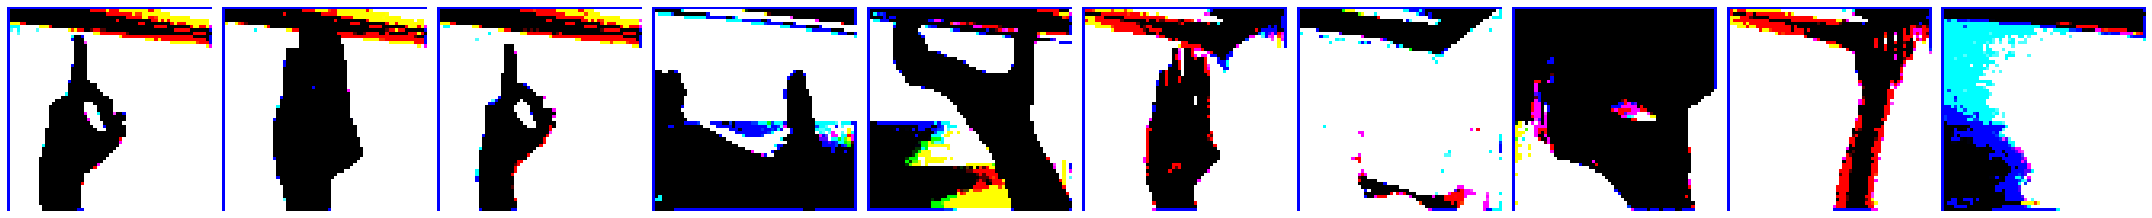

Actual labels
D   B   D   space   space   B   space   space   A   nothing   

In [40]:
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

In [45]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

model = keras.models.load_model(r"model_sign1.h5")

background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

def segment_hand(frame, threshold=25):
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    
    _ , thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)
    
    contours, hierarchy = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) == 0:
        return None
    else:
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        return (thresholded, hand_segment_max_cont)

cam = cv2.VideoCapture(0)
num_frames =0
while True:
    ret, frame = cam.read()

    frame = cv2.flip(frame, 1)

    frame_copy = frame.copy()

    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)


    if num_frames < 70:
        
        cal_accum_avg(gray_frame, accumulated_weight)
        
        cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT", (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    
    else: 
        hand = segment_hand(gray_frame)
        
        if hand is not None:
            
            thresholded, hand_segment = hand

            cv2.drawContours(frame_copy, [hand_segment + (ROI_right, ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Thesholded Hand Image", thresholded)
            
            thresholded = cv2.resize(thresholded, (64, 64))
            thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded, (1,thresholded.shape[0],thresholded.shape[1],3))
            
            pred = model.predict(thresholded)
            cv2.putText(frame_copy, word_dict[np.argmax(pred)], (170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right, ROI_bottom), (255,128,0), 3)
    num_frames += 1

    cv2.putText(frame_copy, "Communicator", (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)


    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

cam.release()
cv2.destroyAllWindows()


In [2]:
from tensorflow.contrib import lite
keras_file='model_sign1.h5'
converter=lite.TocoConverter.from_keras_model_file(keras_file)
tflite_model=converter.convert()
open('model.tflite','wb').write(tflite_model)